1. Load the provided dataset and import in pandas DataFrame.

In [8]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/bank .csv")


2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object
(b) unique values of those columns.
(c) check for the total number of null values in each column

In [9]:
# Get DataFrame information
data_info = data.info()

# Identify columns with dtype=object
object_columns = data.select_dtypes(include=['object']).columns

# Find unique values in object columns
unique_values = {col: data[col].unique() for col in object_columns}

# Check for null values in each column
null_values = data.isnull().sum()

# Display results
print("Object Columns:", object_columns)
print("Unique Values in Object Columns:", unique_values)
print("Null Values in Each Column:\n", null_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Object Columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
    

3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”

In [10]:
# Drop object columns
numeric_data = data.drop(columns=object_columns)

# Save the new numeric DataFrame to a CSV file
numeric_data.to_csv("banknumericdata.csv", index=False)


4. Read ”banknumericdata.csv” and Find the summary statistics.


In [7]:
# Load the numeric data
numeric_data = pd.read_csv("banknumericdata.csv")

# Display summary statistics
summary_statistics = numeric_data.describe()
print(summary_statistics)


                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.

In [16]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/banknumericdata.csv")
data.head()  # Display the first few rows


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


2. Check info of the DataFrame and identify column with missing (null) values.

In [17]:
# Check for missing values
null_values = data.isnull().sum()

print("Missing values in each column:")
print(null_values)

# Columns with missing values
columns_with_missing = null_values[null_values > 0].index
print("\nColumns with missing values:", list(columns_with_missing))


Missing values in each column:
age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

Columns with missing values: []


3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.


In [18]:
# Fill missing values in each column
for col in columns_with_missing:
    if data[col].dtype == 'float64' or data[col].dtype == 'int64':
        # Numeric columns: Use mean
        data[col].fillna(data[col].mean(), inplace=True)
        print(f"Filled missing values in '{col}' with mean because it is numeric data and mean preserves the overall dataset distribution.")
    elif data[col].dtype == 'object':
        # Categorical columns: Use mode
        data[col].fillna(data[col].mode()[0], inplace=True)
        print(f"Filled missing values in '{col}' with mode because it is categorical data and mode represents the most common value.")

# Confirm no missing values remain
print("\nMissing values after imputation:")
print(data.isnull().sum())



Missing values after imputation:
age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64


4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [13]:
# Check for duplicate rows in the dataset
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows in the dataset: {duplicate_count}")

# If duplicates are found, drop them
if duplicate_count > 0:
    data = data.drop_duplicates()
    print(f"{duplicate_count} duplicate rows removed from the dataset.")
else:
    print("No duplicate rows found in the dataset.")


Number of duplicate rows in the dataset: 0
No duplicate rows found in the dataset.


Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic dataset
data = pd.read_csv("/content/Titanic-Dataset.csv")

# Subset the DataFrame
subset = data[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Filter rows where 'Pclass' == 1
first_class = subset[subset['Pclass'] == 1]

# Calculate statistics for 'Fare'
mean_fare = first_class['Fare'].mean()
median_fare = first_class['Fare'].median()
max_fare = first_class['Fare'].max()
min_fare = first_class['Fare'].min()

# Print statistics
print("Fare Statistics for First-Class Passengers:")
print(f"Mean: {mean_fare}, Median: {median_fare}, Max: {max_fare}, Min: {min_fare}")


Fare Statistics for First-Class Passengers:
Mean: 84.1546875, Median: 60.287499999999994, Max: 512.3292, Min: 0.0


Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.


In [23]:
# Check for null values in 'Age'
null_age_count = first_class['Age'].isnull().sum()
print(f"Number of null values in 'Age': {null_age_count}")

# Drop rows with null values in 'Age'
first_class = first_class.dropna(subset=['Age'])

print(f"DataFrame after dropping null values in 'Age':")
print(first_class.info())



Number of null values in 'Age': 30
DataFrame after dropping null values in 'Age':
<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 1 to 889
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      186 non-null    object 
 1   Pclass    186 non-null    int64  
 2   Sex       186 non-null    object 
 3   Age       186 non-null    float64
 4   Fare      186 non-null    float64
 5   Survived  186 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 10.2+ KB
None


Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [24]:
# One-hot encoding for 'Embarked'
embarked_encoded = pd.get_dummies(data['Embarked'], prefix='Embarked')

# Add the new binary columns to the original DataFrame
data = pd.concat([data, embarked_encoded], axis=1)

# Drop the original 'Embarked' column
data = data.drop(columns=['Embarked'])

# Display the first few rows of the modified DataFrame
print("Modified DataFrame after one-hot encoding:")
print(data.head())


Modified DataFrame after one-hot encoding:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250  

Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

Mean Survival Rates by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


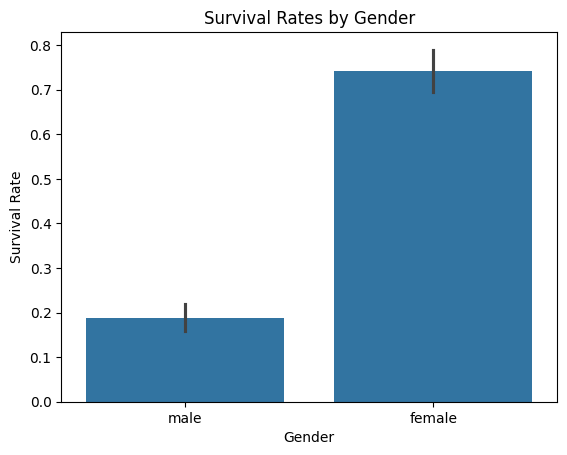

In [25]:
# Calculate mean survival rates by gender
mean_survival_by_gender = data.groupby('Sex')['Survived'].mean()
print("Mean Survival Rates by Gender:")
print(mean_survival_by_gender)

# Visualization
sns.barplot(x='Sex', y='Survived', data=data)
plt.title("Survival Rates by Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Gender")
plt.show()


Problem - 5:
Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Embarked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

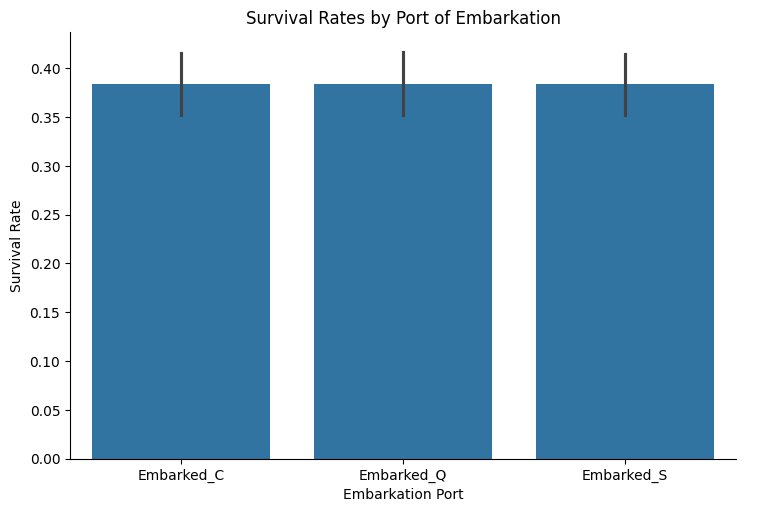

In [26]:
# Calculate survival rates for each embarkation port
survival_by_embarkation = data[['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Survived']]

# Melt the DataFrame for visualization
melted = survival_by_embarkation.melt(id_vars='Survived', var_name='Port', value_name='Value')

# Visualization
sns.catplot(x='Port', y='Survived', data=melted, kind='bar', height=5, aspect=1.5)
plt.title("Survival Rates by Port of Embarkation")
plt.ylabel("Survival Rate")
plt.xlabel("Embarkation Port")
plt.show()


Problem - 6{Optional}:
Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
and age group. Draw a visualization using a any plotting library to represent this graphically.

<ipython-input-27-15f8d11fae7c>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_class_survival = data.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().unstack()


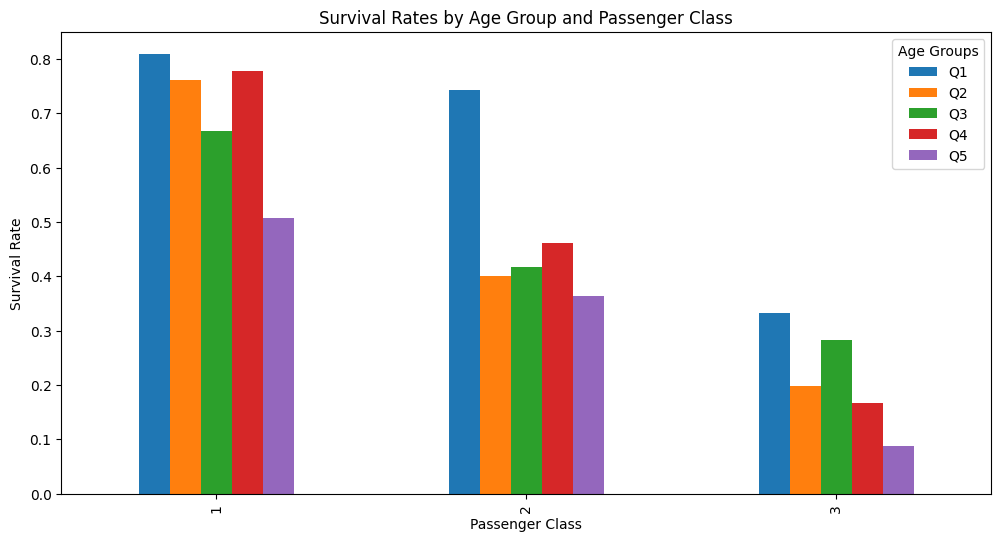

In [27]:
# Create age quantiles
data['AgeGroup'] = pd.qcut(data['Age'], 5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

# Group by passenger class and age group to calculate survival means
age_class_survival = data.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().unstack()

# Visualization
age_class_survival.plot(kind='bar', figsize=(12, 6))
plt.title("Survival Rates by Age Group and Passenger Class")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.legend(title="Age Groups")
plt.show()
